## Логистическая регрессия

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)

Реализуйте обучение логистической регрессии с $L^1$ и $L^2$ регуляризацией с помощью метода Stochastic Gradient Descent (SGD)

#### Замечания
* В SGD градиент расчитывается по одному случайному объекту
* Для отладки работы алгоритма, реализуйте возможность сохранения или вывода ошибки модели после очередной итерации
* Правило останова - максимальное количество эпох
    
Эпохой в SGD и MB-SGD называется один проход по **всем** объектам в выборке (тем или иным способом)

# Реализация модели

In [29]:
theta = np.random.randn(3,1)
theta
np.square(theta)

array([[ 0.28277369],
       [ 0.27479279],
       [ 0.63323733]])

In [71]:
from sklearn.base import BaseEstimator, ClassifierMixin


class MySGDClassifier(BaseEstimator, ClassifierMixin):
    """
    Предполагается, что в выборке всегда 2 класса
    """
    
    def __init__(self, C=1, alpha=0.01, max_epoch=10, penalty='l2'):
        """
        C - коэф. регуляризации
        alpha - скорость спуска
        max_epoch - максимальное количество эпох
        """
        
        self.C = C
        self.alpha = alpha
        self.max_epoch = max_epoch
        self.penalty = penalty
        self.loses = []

        
    def sigmoid(self, scores):
        return 1 / (1 + np.exp(-scores))          

    
    def logloss(self, X, y):
        yt = np.dot(X, self.theta)
        #yt = self.predict(X)
        p = self.sigmoid(yt)
        #-log P(yt|yp) = -(yt log(yp) + (1 - yt) log(1 - yp))
        loss = -np.sum(y*np.log(p) + (1 - y) * np.log(1 - p)) / len(X)
        #loss = - y*np.log(p) + (1 - y) * np.log(1 - p)
        return loss


    
    def fit(self,X, y=None):
        #X_b = np.c_[np.ones(len(X), 1), X]
        #X_b = np.c_[np.ones((len(X), 1)), X]
        X_b = np.hstack((np.ones((X.shape[0], 1)), X)) 
        m = len(X)
        alpha = self.alpha
        n_epochs = self.max_epoch
        eps = 0.0001

        self.theta = np.random.randn(3,1)  # random initialization

        for epoch in range(n_epochs):
            p = np.random.permutation(m)
            
            for idx in p:
                random_index = np.random.randint(m)
                xi = X_b[[idx], :]
                yi = y[idx]
                if epoch == idx == 0:
                    regulator = 0
                else:
                    if self.penalty == 'l2':
                        regulator = alpha * self.theta
                    elif  self.penalty == 'l1':
                        regulator = alpha * np.sign(self.theta)
                    else:
                        regulator = 0
                gradients = xi.T.dot((self.sigmoid(np.dot(xi, self.theta)) - yi)) + regulator
                #gradients = 2 * xi.T.dot(xi.dot(self.theta) - yi)
                theta_old  = self.theta
                self.theta = self.theta - alpha * gradients
                dist = np.linalg.norm(self.theta - theta_old)
                #save loss for every iteration
                self.loses.append(self.logloss(X_b, y))
                if dist < eps:
                    return
        return 
        
   
    def partial_fit(self, X, y=None):
        '''
        По желанию - метод дообучения модели на новых данных
        '''
    
        return self
        
    def predict(self, X):
        '''
        Возвращение метки класса
        '''
        return np.sign(X.dot(self.theta))
        
    
    def predict_proba(self, X):
        '''
        Возвращение вероятности каждого из классов
        '''

        
        return y_hat_proba

## Проверка на синтетических данных (2 балл)

Запустите ваш алгоритм на синтетических данных. 
Выведите полученные веса и нарисуйте разделяющую границу между классами.

In [72]:
np.random.seed(0)

C1 = np.array([[0., -0.8], [1.5, 0.8]])
C2 = np.array([[1., -0.7], [2., 0.7]])
gauss1 = np.dot(np.random.randn(200, 2) + np.array([5, 3]), C1)
gauss2 = np.dot(np.random.randn(200, 2) + np.array([1.5, 0]), C2)

X = np.vstack([gauss1, gauss2])
y = np.r_[np.ones(200), np.zeros(200)]
print(X[:5])
print(y[:5])
#plt.scatter(X[:,0], X[:,1], c=y)

[[ 5.10023581 -2.69111611]
 [ 7.8613398  -0.59027583]
 [ 3.03408318 -3.8758687 ]
 [ 4.27296419 -2.4811565 ]
 [ 5.11589775 -1.18894612]]
[ 1.  1.  1.  1.  1.]


In [73]:
#X[[11],:]
#X
model = MySGDClassifier(alpha=0.01, max_epoch=100, penalty='l2')
model.fit(X, y)
model.theta


array([[-2.85254685],
       [ 0.71316485],
       [-0.71740516]])

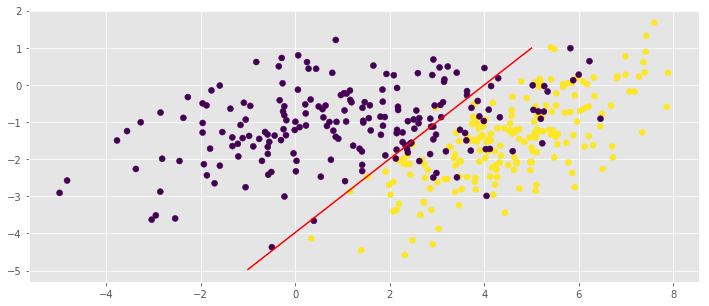

In [74]:
x_naive = np.arange(-1,6,1)
# Ax + By + C -> y = (-AX -C) / B
y_naive = (-model.theta[1] * x_naive - model.theta[0] ) / model.theta[2]
plt.scatter(X[:,0], X[:,1], c=y)
plt.plot(x_naive, y_naive, c='red', label='descision boundary naive')

## Анализ сходимости

Покажите сходимость вашего метода: изобразите графики зависимости значения функции потерь (по всей выборке) после очередной итерации/эпохи (выбрать одно) для разных `alpha`.

In [75]:
loses = np.array(model.loses)

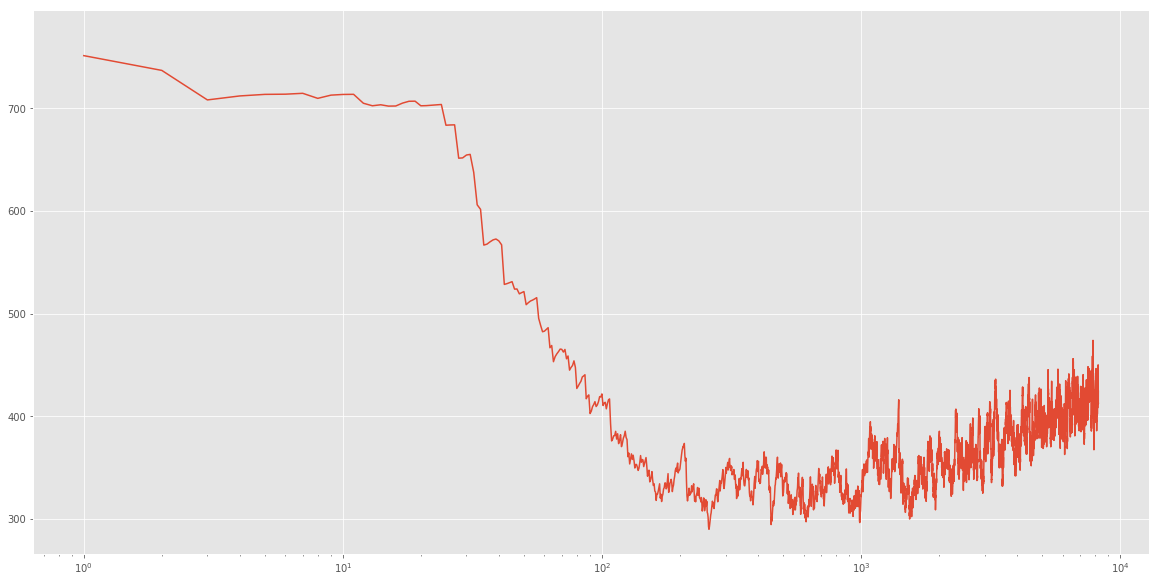

In [76]:
fig, ax= plt.subplots(1, 1, figsize=(20,10))
ax.set_xscale("log")
plt.plot(loses)

array([-4,  4])